**optoSTING results - Figure 3 - Prediction of c-di-GMP diffusion**

# Imports

In [1]:
import sys
sys.path.append('../')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from ast import literal_eval
from analysis_utils import show_seg, show_seg_composite, extract_fl_loc, extract_fl_loc_table
from plotstyle import save_fig, defaultStyle
from scipy.ndimage import center_of_mass
from matplotlib.gridspec import GridSpec
from matplotlib_scalebar.scalebar import ScaleBar
from brokenaxes import brokenaxes
from skimage.measure import regionprops

%matplotlib inline

# c-di-GMP gradient

## Radial diffusion

### Extract fluorescence and location data

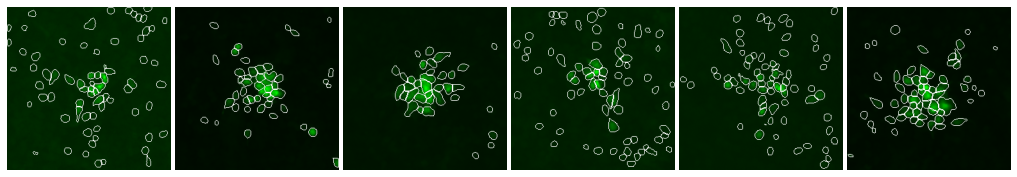

In [2]:
cdn_radial_path = "../data/cdn_radial"
img_idx = [0, 1, 2, 3, 5, 6]
red_seg = [os.path.join(cdn_radial_path, "pos%d_red_seg.npy"%i) for i in img_idx]
ims = [os.path.join(cdn_radial_path, "pos%d.ome.tif")%i for i in img_idx]
green_seg = [os.path.join(cdn_radial_path, "pos%d_green_seg.npy"%i) for i in img_idx]
_, ax = plt.subplots(1, 6, figsize=(18, 3))
plt.subplots_adjust(wspace=0.02)
props_group = []
red_centroid_group = []
for i in range(6):
    show_seg(green_seg[i], ims[i], ax=ax[i], chan=1, adjust=1)
    props = extract_fl_loc(green_seg[i], ims[i], chan=1)
    red_centroid = center_of_mass(np.load(red_seg[i], allow_pickle=True).item()['mask'])
    red_centroid_group.append(red_centroid)
    props_group.append(np.array([[p.mean_intensity, np.sqrt(((np.array(p.centroid) - np.array(red_centroid)) ** 2).sum())] for p in props]))

### Main figures

../plotstyle.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


Saving figure cdn_radial_diffusion


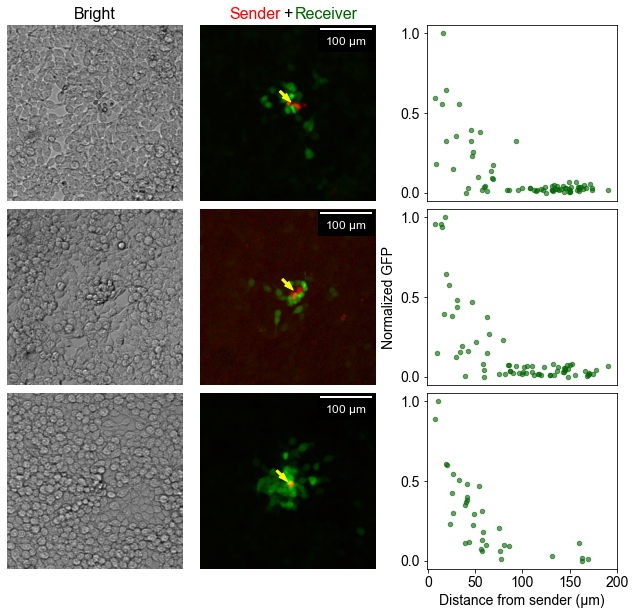

In [3]:
main_fig_index  = [3, 0, 2]
fig = plt.figure(figsize=(11, 10))
gs1 = GridSpec(3, 2, right=0.6, figure=fig, hspace=0.05, wspace=0.05)
gs2 = GridSpec(3, 1, left=0.66, figure=fig, hspace=0.05)
defaultStyle()

for i, idx in enumerate(main_fig_index):
    ax1 = fig.add_subplot(gs1[i, 0])
    ax1.imshow(skimage.io.imread(ims[idx])[:, :, 0], cmap="gray")
    ax2 = fig.add_subplot(gs1[i, 1])
    raw_im = skimage.io.imread(ims[idx])
    rgb_im = np.zeros_like(raw_im, dtype=float)
    rgb_im[:, :, 0] = (raw_im[:, :, 2] - np.min(raw_im[:, :, 2])) / (np.max(raw_im[:, :, 2]) - np.min(raw_im[:, :, 2]))
    rgb_im[:, :, 1] = (raw_im[:, :, 1] - np.min(raw_im[:, :, 1])) / (np.max(raw_im[:, :, 1]) - np.min(raw_im[:, :, 1]))
    ax2.imshow(rgb_im)
    scalebar = ScaleBar(1.3, units="um", color="w", box_color='k', fixed_value=100, font_properties={"size": 12, "family": "Arial"})
    ax2.add_artist(scalebar)
    arrowlen = 20
    ax2.arrow(red_centroid_group[idx][1] - arrowlen, red_centroid_group[idx][0] - arrowlen, arrowlen * 0.8, arrowlen * 0.8, width=3, color="yellow", length_includes_head=True)
    for ax in [ax1, ax2]:
        ax.axis('off')
    ax3 = fig.add_subplot(gs2[i])
    distances = props_group[idx][:, 1] * 1.3
    fluorescences = props_group[idx][:, 0]
    fluorescences = (fluorescences - fluorescences.min()) / (fluorescences.max() - fluorescences.min())
    ax3.scatter(distances, fluorescences, s=20, c="darkgreen", alpha=0.6)
    ax3.set_yticks([0, 0.5, 1])
    ax3.set_xticks([])
    if i == 0:
        ax1.text(128, -5, "Bright", ha="center", va="bottom", size=16)
        ax2.text(80, -5, "Sender", ha="center", va="bottom", size=16, color="red")
        ax2.text(128, -5, "+", ha="center", va="bottom", size=16, color="black")
        ax2.text(184, -5, "Receiver", ha="center", va="bottom", size=16, color="darkgreen")
    if i == 2:
        ax3.set_xticks([0, 50, 100, 150, 200])
        ax3.set_xlabel(r"Distance from sender (μm)")
    if i == 1:
        ax3.set_ylabel("Normalized GFP")
save_fig("cdn_radial_diffusion")

### Supplementary figures

Saving figure cdn_radial_diffusion_supp


../plotstyle.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


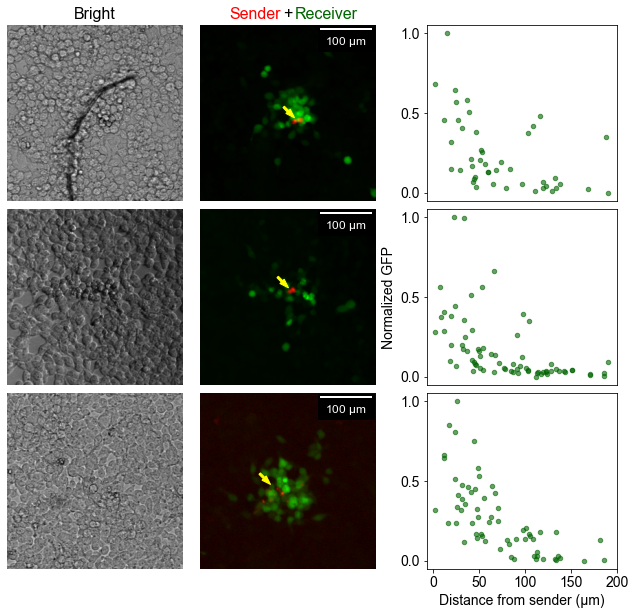

In [4]:
main_fig_index  = [1, 4, 5]
fig = plt.figure(figsize=(11, 10))
gs1 = GridSpec(3, 2, right=0.6, figure=fig, hspace=0.05, wspace=0.05)
gs2 = GridSpec(3, 1, left=0.66, figure=fig, hspace=0.05)
defaultStyle()

for i, idx in enumerate(main_fig_index):
    ax1 = fig.add_subplot(gs1[i, 0])
    ax1.imshow(skimage.io.imread(ims[idx])[:, :, 0], cmap="gray")
    ax2 = fig.add_subplot(gs1[i, 1])
    raw_im = skimage.io.imread(ims[idx])
    rgb_im = np.zeros_like(raw_im, dtype=float)
    rgb_im[:, :, 0] = (raw_im[:, :, 2] - np.min(raw_im[:, :, 2])) / (np.max(raw_im[:, :, 2]) - np.min(raw_im[:, :, 2]))
    rgb_im[:, :, 1] = (raw_im[:, :, 1] - np.min(raw_im[:, :, 1])) / (np.max(raw_im[:, :, 1]) - np.min(raw_im[:, :, 1]))
    ax2.imshow(rgb_im)
    scalebar = ScaleBar(1.3, units="um", color="w", box_color='k', fixed_value=100, font_properties={"size": 12, "family": "Arial"})
    ax2.add_artist(scalebar)
    arrowlen = 20
    ax2.arrow(red_centroid_group[idx][1] - arrowlen, red_centroid_group[idx][0] - arrowlen, arrowlen * 0.8, arrowlen * 0.8, width=3, color="yellow", length_includes_head=True)
    for ax in [ax1, ax2]:
        ax.axis('off')
    ax3 = fig.add_subplot(gs2[i])
    distances = props_group[idx][:, 1] * 1.3
    fluorescences = props_group[idx][:, 0]
    fluorescences = (fluorescences - fluorescences.min()) / (fluorescences.max() - fluorescences.min())
    ax3.scatter(distances, fluorescences, s=20, c="darkgreen", alpha=0.6)
    ax3.set_yticks([0, 0.5, 1])
    ax3.set_xticks([])
    if i == 0:
        ax1.text(128, -5, "Bright", ha="center", va="bottom", size=16)
        ax2.text(80, -5, "Sender", ha="center", va="bottom", size=16, color="red")
        ax2.text(128, -5, "+", ha="center", va="bottom", size=16, color="black")
        ax2.text(184, -5, "Receiver", ha="center", va="bottom", size=16, color="darkgreen")
    if i == 2:
        ax3.set_xticks([0, 50, 100, 150, 200])
        ax3.set_xlabel(r"Distance from sender (μm)")
    if i == 1:
        ax3.set_ylabel("Normalized GFP")
save_fig("cdn_radial_diffusion_supp")

## Linear diffusion

Saving figure cdn_linear_diffusion


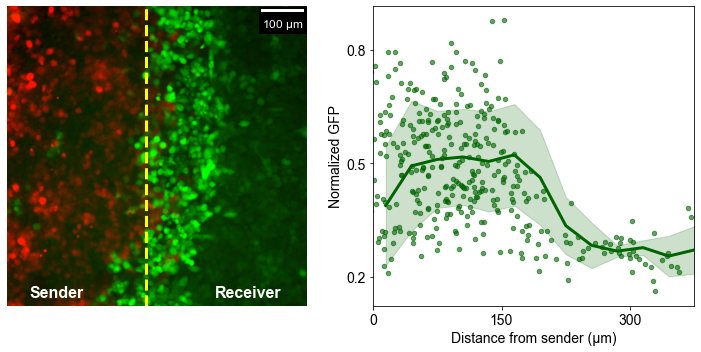

In [5]:
cdn_linear_path = "../data/cdn_linear/Cx43_dox_0"
im = skimage.io.imread("../data/cdn_linear/Cx43_dox_0/dox_0.tif")
im_rgb = np.zeros((im.shape[1], im.shape[2], 3), dtype=float)
im_rgb[:, :, 0] = (im[0, :, :] - im[0, :, :].min()) / (im[0, :, :].max() - im[0, :, :].min())
im_rgb[:, :, 1] = (im[1, :, :] - im[1, :, :].min()) / (im[1, :, :].max() - im[1, :, :].min())
green_masks = np.load(os.path.join(cdn_linear_path, "dox_0_green_seg.npy"), allow_pickle=True).item()["masks"]
props = regionprops(green_masks, intensity_image=im_rgb[:, :, 1])
props_arr = np.array([[p.mean_intensity, p.centroid[1]] for p in props])
srbound = 500

_, ax = plt.subplots(1, 2, figsize=(10, 5))
# plt.subplots_adjust(wspace=0.2)
ax[0].imshow(im_rgb)
ax[0].axis("off")
scalebar = ScaleBar(0.65, units="um", color="w", box_color='k', fixed_value=100, font_properties={"size": 12, "family": "Arial"})
ax[0].add_artist(scalebar)
ax[0].text(80, 1050, "Sender", color="w", weight="bold", fontsize=16)
ax[0].text(750, 1050, "Receiver", color="w", weight="bold", fontsize=16)
ax[0].axvline(srbound, c="yellow", lw=3, linestyle="--")
xbin = np.arange(0, 350, 30)
distances = (props_arr[:, 1] - srbound) * 0.65
intensities = props_arr[:, 0]
binned_distances = np.digitize(distances, xbin)
gradient_data = np.stack([binned_distances, intensities], axis=1)
gradient_df = pd.DataFrame(gradient_data, columns=["binned_distance", "intensity"])
gradient_df.binned_distance = gradient_df.binned_distance.apply(lambda x: x * 30 + 15)
binned_intensities = np.array([[np.mean(intensities[binned_distances==i]), np.std(intensities[binned_distances==i]) / (binned_distances==i).sum()] for i in range(binned_distances.max() + 1)])
ax[1].scatter(distances, intensities, s=20, c="darkgreen", alpha=0.6)
sns.lineplot(x="binned_distance", y="intensity", data=gradient_df, ax=ax[1], ci='sd', color="darkgreen", lw=3)
ax[1].set_xlabel("Distance from sender (μm)")
ax[1].set_ylabel("Normalized GFP")
ax[1].set_xlim([0, 375])
ax[1].set_yticks([0.2, 0.5, 0.8])
ax[1].set_xticks([0, 150, 300])
save_fig("cdn_linear_diffusion")

# Prediction with the *ReLU* model

## Show segmentation
**Skip this part if segmentation performance has been verified.**

In [ ]:
image_path = "../data/cdn_srmix/"
# _, ax = plt.subplots(18, 9, figsize=(36, 72))
# plt.subplots_adjust(hspace=1e-2, wspace=1e-2)
# for a in ax.flatten():
#    a.axis('off')
# plt.subplots_adjust(wspace=1e-2, hspace=1e-2)
for j, group in tqdm(enumerate(["%s0%d"%(ratio_group, view) for ratio_group in ["B", "C", "D"] for view in [2, 3, 4]])):
    for i, suffix in enumerate(["_1fold-scale"]): # ["_1fold-scale", "_3fold-scale"]
        for number in range(1, 10):
            if "1" in suffix:
                seg_file = os.path.join(image_path, "seg", "%s-%d-nonscale_gray_seg.npy"%(group, number))
                img_file = os.path.join(image_path, "raw", "%s-%d-nonscale.tif"%(group, number))
            elif "3" in suffix:
                seg_file = os.path.join(image_path, "seg", "%s-%d_gray_seg.npy"%(group, number))
                img_file = os.path.join(image_path, "raw", "%s-%d.tif"%(group, number))
            im_gray = skimage.io.imread(img_file)[:, :, 2]
            im_gray = (im_gray - im_gray.min()) / (im_gray.max() - im_gray.min())
            # ax[2*j, number-1].imshow(im_gray, cmap="gray")
            ax[1 + 2*j, number-1].imshow(np.load(seg_file, allow_pickle=True).item()['outlines']>0, cmap="gray")
# save_fig("Segmentation_results_nonscale")

## Extract locations and fluorescence

In [101]:
def cdn_srmix_info(group, i):
    seg_file, img_file = "%s-%d-nonscale_gray_seg.npy"%(group, i), "%s-%d-nonscale.tif"%(group, i)
    seg_file = os.path.join(image_path, "seg", seg_file)
    img_file = os.path.join(image_path, "raw", img_file)
    red_props = extract_fl_loc(seg_file, img_file)
    green_props = extract_fl_loc(seg_file, img_file, chan=1)
    group_data = np.array([[i, p.mean_intensity, q.mean_intensity, p.centroid[0], p.centroid[1]] for i, p, q in zip(list(range(1, len(red_props)+1)), red_props, green_props)])
    group_df = pd.DataFrame(group_data, columns=["label", "red_fl", "green_fl", "x", "y"])
    group_df["group"] = group
    group_df["repeat"] = i
    return group_df

groups = ["%s0%d"%(ratio_group, view) for ratio_group in ["B", "C", "D"] for view in [2, 3, 4]]
group_dfs = [cdn_srmix_info(group, i) for group in tqdm(groups) for i in range(1, 10)]
group_all_df = pd.concat(group_dfs).reset_index(drop=True)
scaler = MinMaxScaler()
group_all_df['label'] = group_all_df.label.apply(int)
group_all_df['lognorm_red_fl'] = scaler.fit_transform(np.array(group_all_df.red_fl.apply(np.log)).reshape(-1, 1))
group_all_df['lognorm_green_fl'] = scaler.fit_transform(np.array(group_all_df.green_fl.apply(np.log)).reshape(-1, 1))
group_all_df['isSender'] = group_all_df.lognorm_red_fl > group_all_df.lognorm_green_fl
group_all_df.to_csv("../data/cdn_srmix/results.csv", index=False)

  0%|          | 0/9 [00:00<?, ?it/s]

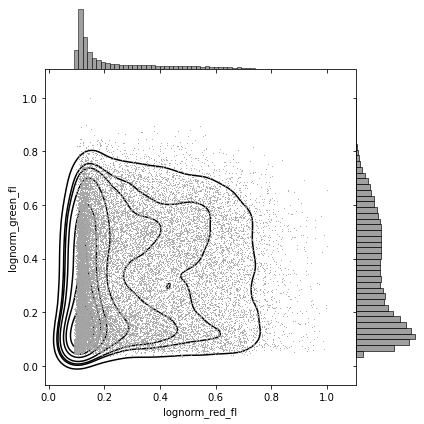

In [11]:
group_all_df = pd.read_csv("../data/cdn_srmix/results.csv")
g = sns.jointplot(data=group_all_df[group_all_df.group == "D04"], x="lognorm_red_fl", y="lognorm_green_fl", color="gray", s=1, space=0)
g.plot_joint(sns.kdeplot, color="k", zorder=0, levels=8)

Saving figure cdn_srmix_fluorescence_distribution


../plotstyle.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


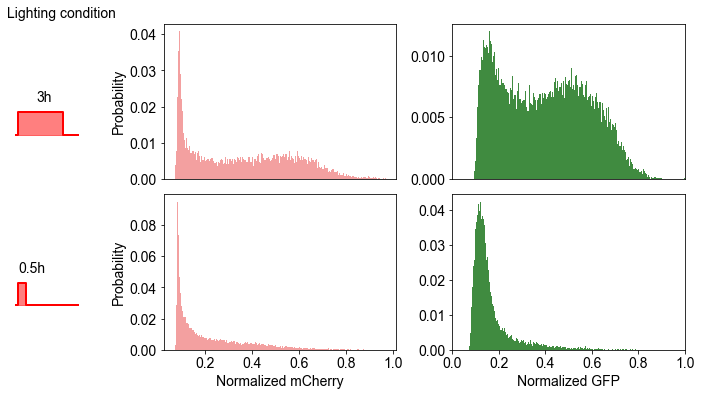

In [101]:
defaultStyle()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 3, width_ratios=[2, 5, 5], height_ratios=[1, 1], wspace=0.3, hspace=0.1)
ax = [fig.add_subplot(gs[i, j]) for i in [0, 1] for j in [1, 2]]
hist_kwargs = {"bins": 200, "edgecolor": None, "stat": "probability"}
sns.histplot(group_all_df[(group_all_df.isSender) & (group_all_df.group == "D04")].lognorm_red_fl, color="lightcoral", ax=ax[0], **hist_kwargs);
sns.histplot(group_all_df[np.logical_not(group_all_df.isSender) & (group_all_df.group == "D04")].lognorm_green_fl, color="darkgreen", ax=ax[1], alpha=0.75, **hist_kwargs);
sns.histplot(group_all_df[(group_all_df.isSender) & (group_all_df.group == "D02")].lognorm_red_fl, color="lightcoral", ax=ax[2], **hist_kwargs);
sns.histplot(group_all_df[np.logical_not(group_all_df.isSender) & (group_all_df.group == "D02")].lognorm_green_fl, color="darkgreen", ax=ax[3], alpha=0.75, **hist_kwargs);
for a in ax[:2]:
    a.set_xticks([])
    a.set_xlabel("")
for a in ax[1::2]:
    a.set_ylabel("")
    a.set_xlim([0, 1])

ax[2].set_xlabel("Normalized mCherry")
ax[3].set_xlabel("Normalized GFP")

ax = fig.add_subplot(gs[1, 0])
ax.plot([-0.2, 0, 0, 0.5, 0.5, 4], [0, 0, 1, 1, 0, 0], c="r", lw=2)
ax.fill([0, 0, 0.5, 0.5, 0], [0, 1, 1, 0, 0], color="r", alpha=0.5)
ax.set_xlim([-0.2, 6])
ax.set_ylim([-2, 5])
ax.axis("off")
ax.text(0.0, 1.5, "0.5h", fontsize=14)

ax = fig.add_subplot(gs[0, 0])
ax.plot([-0.2, 0, 0, 3, 3, 4], [0, 0, 1, 1, 0, 0], c="r", lw=2)
ax.fill([0, 0, 3, 3, 0], [0, 1, 1, 0, 0], color="r", alpha=0.5)
ax.set_xlim([-0.2, 6])
ax.set_ylim([-2, 5])
ax.axis("off")
ax.text(1.2, 1.5, "3h", fontsize=14)
ax.set_title("Lighting condition", fontsize=14)
save_fig("cdn_srmix_fluorescence_distribution")

## Prediction receiver activation

### Determine the activation threshold

In [2]:
red_thresh = 0.3
green_thresh = 0.4
group_all_df = pd.read_csv("../data/cdn_srmix/results.csv")
group_all_df["isActiv"] = ((group_all_df.lognorm_red_fl > red_thresh) & (group_all_df.isSender)) | ((group_all_df.lognorm_green_fl > green_thresh) & np.logical_not(group_all_df.isSender))

### Predictions

In [9]:
def relu(x, tp):
    return (x > tp) * 1 / (1 - tp) * (x - tp)


def linear(x, tp):
    x_half = tp + (1 - tp) / 2
    return 1 / 2 / x_half * x


def sigmoid(x, tp, n=5):
    x_half = tp + (1 - tp) / 2
    return x ** n / (x_half ** n + x ** n)

def count_neighboring_activated_senders(group, repeat, neighborhood, data=group_all_df):
    df = data[(data.group == group) & (data.repeat == repeat)]
    sender_df = df[df.isSender]
    # print(sender_df.isActiv.sum() / len(sender_df))
    receiver_df = df[np.logical_not(df.isSender)].copy(deep=True)
    # print(receiver_df.isActiv.sum() / len(receiver_df))
    for i in receiver_df.index:
        x0 = receiver_df.loc[i, 'x']
        y0 = receiver_df.loc[i, 'y']
        neighbor_sender_df = sender_df[(sender_df.x > x0 - neighborhood) & (sender_df.x < x0 + neighborhood) & (sender_df.y > y0 - neighborhood) & (sender_df.y < y0 + neighborhood)]
        neighboring_sender_activ_arr = neighbor_sender_df[np.sqrt((neighbor_sender_df.x - x0) ** 2 + (neighbor_sender_df.y - y0) ** 2) <= neighborhood].isActiv
        nSender = len(neighboring_sender_activ_arr)
        if nSender==0:
            receiver_df.loc[i, 'fs'] = 0
        else:
            neighboring_sender_activ_ratio = neighboring_sender_activ_arr.sum() / len(neighboring_sender_activ_arr)
            receiver_df.loc[i, 'fs'] = neighboring_sender_activ_ratio
    return receiver_df

group2tp = lambda x: {"B": 0.35, "C": 0.68, "D": 0.85}[x[0]]
cell_diameter = 12

prediction_performance_df = pd.DataFrame()
idx = 0
for group in ["%s0%d"%(ratio_group, view) for ratio_group in ["B", "C", "D"] for view in [2, 3, 4]]:
    print(group)
    tp = group2tp(group)
    for i in tqdm(range(1, 10)):
        kernel_size = 3
        neighborhood = kernel_size * cell_diameter
        receiver_df = count_neighboring_activated_senders(group, i, neighborhood=neighborhood)
        for predfunc in [relu, linear, sigmoid]:
            receiver_df["isActiv_pred"] = receiver_df.fs.apply(lambda x: np.random.uniform() <= predfunc(x, tp))
            prediction_performance_df.loc[idx, "group"] = group
            prediction_performance_df.loc[idx, "f1_macro"] = f1_score(receiver_df.isActiv, receiver_df.isActiv_pred, average="macro")
            prediction_performance_df.loc[idx, "acc"] = accuracy_score(receiver_df.isActiv, receiver_df.isActiv_pred)
            prediction_performance_df.loc[idx, "predfunc"] = f'{predfunc}'.split(' ')[1]
            prediction_performance_df.loc[idx, "kernel_size"] = kernel_size
            prediction_performance_df.loc[idx, "repeat"] = i
            idx += 1
        for kernel_size in [1, 2, 4, 5, 6, 7, 8]:
            neighborhood = kernel_size * cell_diameter
            receiver_df = count_neighboring_activated_senders(group, i, neighborhood=neighborhood)
            receiver_df["isActiv_pred"] = receiver_df.fs.apply(lambda x: np.random.uniform() <= relu(x, tp))
            prediction_performance_df.loc[idx, "group"] = group
            prediction_performance_df.loc[idx, "f1_macro"] = f1_score(receiver_df.isActiv, receiver_df.isActiv_pred, average="macro")
            prediction_performance_df.loc[idx, "acc"] = accuracy_score(receiver_df.isActiv, receiver_df.isActiv_pred)
            prediction_performance_df.loc[idx, "predfunc"] = "relu"
            prediction_performance_df.loc[idx, "kernel_size"] = kernel_size
            prediction_performance_df.loc[idx, "repeat"] = i
            idx += 1
prediction_performance_df.to_csv("../data/cdn_srmix/prediction_performance.csv", index=False)

### Main figure
Same lighting condition, varying the mixing ratio

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/liboyan/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/liboyan/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new in

Saving figure cdn_prediction_main


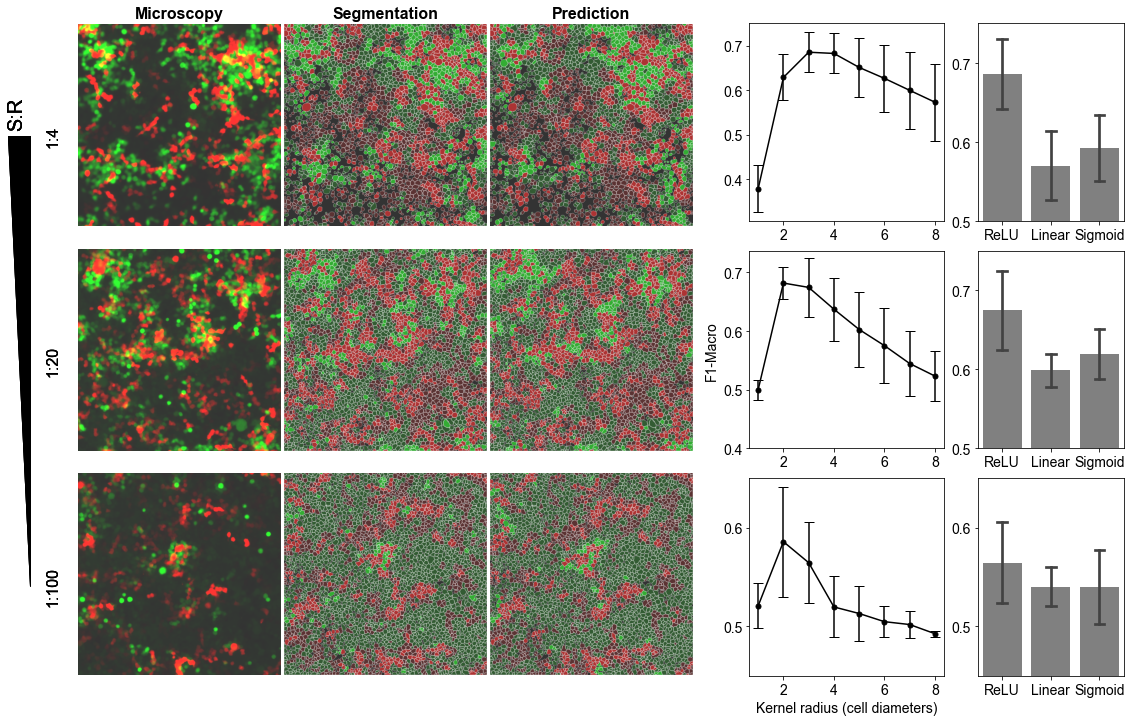

In [165]:
defaultStyle()
fig = plt.figure(figsize=(20, 12))
gs1 = GridSpec(nrows=3, ncols=4, right=0.6, width_ratios=[1, 3, 3, 3], wspace=0.02, hspace=0.1)
gs2 = GridSpec(nrows=3, ncols=2, left=0.64, width_ratios=[4, 3], hspace=0.15)
groups = ["D04", "D03", "D02"]
image_path = "../data/cdn_srmix/"
for i, group in enumerate(groups):
                
    repeat = [7, 3, 3][i]
    img_file = os.path.join(image_path, "raw", "%s-%d-nonscale.tif"%(group, repeat))
    img = skimage.io.imread(img_file)
    img_rgb = np.zeros_like(img, dtype=float)
    img_rgb[:, :, 0] = (img[:, :, 0] - img[:, :, 0].min()) / (img[:, :, 0].max() - img[:, :, 0].min()) * 5
    img_rgb[:, :, 1] = (img[:, :, 1] - img[:, :, 1].min()) / (img[:, :, 1].max() - img[:, :, 1].min()) * 3
    ax = fig.add_subplot(gs1[i, 1])
    ax.imshow(img_rgb, alpha=0.8)
    ax.axis("off")
    if i == 0:
        ax.set_title("Microscopy", fontsize=16, weight="bold")
        
    ax = fig.add_subplot(gs1[i, 2])
    data = group_all_df[(group_all_df.group==group) & (group_all_df.repeat==repeat)]
    seg_file = os.path.join(image_path, "seg", "%s-%d-nonscale_gray_seg.npy"%(group, repeat))
    masks = np.load(seg_file, allow_pickle=True).item()["masks"]
    outlines = np.load(seg_file, allow_pickle=True).item()["outlines"]
    seg_rgb = np.zeros_like(img, dtype=float)
    seg_rgb[:, :, 0] = np.isin(masks, data[(data.isActiv) & (data.isSender)].label) * 0.6
    seg_rgb[:, :, 0] += np.isin(masks, data[np.logical_not(data.isActiv) & (data.isSender)].label) * 0.2
    seg_rgb[:, :, 1] = np.isin(masks, data[(data.isActiv) & np.logical_not(data.isSender)].label) * 0.6
    seg_rgb[:, :, 1] += np.isin(masks, data[np.logical_not(data.isActiv) & np.logical_not(data.isSender)].label) * 0.2
    seg_rgb[outlines > 0] = 1
    ax.imshow(seg_rgb, alpha=0.8)
    ax.axis("off")
    if i == 0:
        ax.set_title("Segmentation", fontsize=16, weight="bold")
    
    ax = fig.add_subplot(gs1[i, 3])
    data = group_all_df[(group_all_df.group==group) & (group_all_df.repeat==repeat)]
    receiver_df = count_neighboring_activated_senders(group, repeat, neighborhood=36)
    receiver_df["isActiv_pred"] = receiver_df.fs.apply(lambda x: np.random.uniform() <= relu(x, 0.85))
    seg_file = os.path.join(image_path, "seg", "%s-%d-nonscale_gray_seg.npy"%(group, repeat))
    masks = np.load(seg_file, allow_pickle=True).item()["masks"]
    outlines = np.load(seg_file, allow_pickle=True).item()["outlines"]
    seg_rgb = np.zeros_like(img, dtype=float)
    seg_rgb[:, :, 0] = np.isin(masks, data[(data.isActiv) & (data.isSender)].label) * 0.6
    seg_rgb[:, :, 0] += np.isin(masks, data[np.logical_not(data.isActiv) & (data.isSender)].label) * 0.2
    seg_rgb[:, :, 1] = np.isin(masks, receiver_df[(receiver_df.isActiv_pred) & np.logical_not(receiver_df.isSender)].label) * 0.6
    seg_rgb[:, :, 1] += np.isin(masks, receiver_df[np.logical_not(receiver_df.isActiv_pred) & np.logical_not(receiver_df.isSender)].label) * 0.2
    seg_rgb[outlines > 0] = 1
    ax.imshow(seg_rgb, alpha=0.8)
    ax.axis("off")
    if i == 0:
        ax.set_title("Prediction", fontsize=16, weight="bold")
        
    data = prediction_performance_df[(prediction_performance_df.group == group) & (prediction_performance_df.predfunc=="relu")]
    ax = fig.add_subplot(gs2[i, 0])
    f1_macro_arr = np.array([[np.mean(data[data.kernel_size==s].f1_macro), np.std(data[data.kernel_size==s].f1_macro)] for s in np.arange(1, 9)])
    ax.errorbar(np.arange(1, 9), f1_macro_arr[:, 0], f1_macro_arr[:, 1], c="k", capsize=5, markersize=5, marker="o")
    ax.set_xlabel("")
    ax.set_ylabel("")
    if i == 0:
        ax.set_yticks([0.4, 0.5, 0.6, 0.7])
    elif i == 1:
        ax.set_ylabel("F1-Macro")
        ax.set_yticks([0.4, 0.5, 0.6, 0.7])
    elif i == 2:
        ax.set_xlabel("Kernel radius (cell diameters)")
        ax.set_ylim([0.45, 0.65])
        ax.set_yticks([0.5, 0.6])
        
        
    ax = fig.add_subplot(gs2[i, 1])
    sns.barplot(
        data=prediction_performance_df[(prediction_performance_df.group == group) & (prediction_performance_df.kernel_size==3)],
        x="predfunc",
        y="f1_macro",
        ax=ax,
        ci="sd",
        color="gray",
        capsize=0.2
    )
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_ylim([0.45, 0.75])
    ax.set_xticklabels(["ReLU", "Linear", "Sigmoid"])
    if i in [0, 1]:
        ax.set_ylim([0.5, 0.75])
        ax.set_yticks([0.5, 0.6, 0.7])
    else:
        ax.set_ylim([0.45, 0.65])
        ax.set_yticks([0.5, 0.6])

    ax_left = fig.add_subplot(gs1[:, 0])
    ax_left.fill([1, 1, 0.5, 1], [0, 1, 1, 0], color="k")
    ax_left.set_xlim([0.5, 2])
    ax_left.set_ylim([-0.2, 1.25])
    ax_left.text(0.7, 1.05, "S:R", ha='center', va='center', fontdict={"size": 20, "family": "Arial"}, rotation="vertical")
    ax_left.text(1.5, 0, "1:100", ha='center', va='center', fontdict={"size": 16, "family": "Arial"}, rotation="vertical")
    ax_left.text(1.5, 0.5, "1:20", ha='center', va='center', fontdict={"size": 16, "family": "Arial"}, rotation="vertical")
    ax_left.text(1.5, 1, "1:4", ha='center', va='center', fontdict={"size": 16, "family": "Arial"}, rotation="vertical")
    ax_left.axis("off")
save_fig("cdn_prediction_main")

### Supplementary
Same mixing ratio, varying lighting conditions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/liboyan/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/liboyan/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavio

Saving figure cdn_prediction_supp


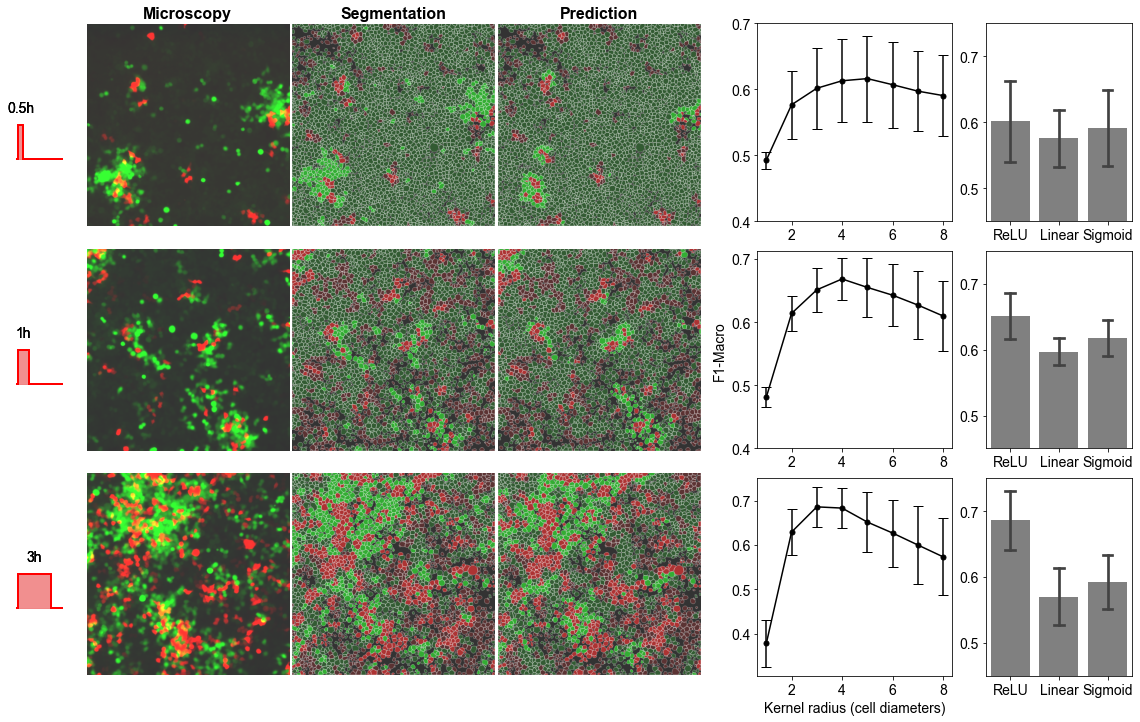

In [187]:
defaultStyle()
fig = plt.figure(figsize=(20, 12))
gs1 = GridSpec(nrows=3, ncols=4, right=0.6, width_ratios=[1, 3, 3, 3], wspace=0.02, hspace=0.1)
gs2 = GridSpec(nrows=3, ncols=2, left=0.64, width_ratios=[4, 3], hspace=0.15)
groups = ["B04", "C04", "D04"]
image_path = "../data/cdn_srmix/"
for i, group in enumerate(groups):
                
    repeat = [1, 9, 6][i]
    img_file = os.path.join(image_path, "raw", "%s-%d-nonscale.tif"%(group, repeat))
    img = skimage.io.imread(img_file)
    img_rgb = np.zeros_like(img, dtype=float)
    img_rgb[:, :, 0] = (img[:, :, 0] - img[:, :, 0].min()) / (img[:, :, 0].max() - img[:, :, 0].min()) * 5
    img_rgb[:, :, 1] = (img[:, :, 1] - img[:, :, 1].min()) / (img[:, :, 1].max() - img[:, :, 1].min()) * 3
    ax = fig.add_subplot(gs1[i, 1])
    ax.imshow(img_rgb, alpha=0.8)
    ax.axis("off")
    if i == 0:
        ax.set_title("Microscopy", fontsize=16, weight="bold")
        
    ax = fig.add_subplot(gs1[i, 2])
    data = group_all_df[(group_all_df.group==group) & (group_all_df.repeat==repeat)]
    seg_file = os.path.join(image_path, "seg", "%s-%d-nonscale_gray_seg.npy"%(group, repeat))
    masks = np.load(seg_file, allow_pickle=True).item()["masks"]
    outlines = np.load(seg_file, allow_pickle=True).item()["outlines"]
    seg_rgb = np.zeros_like(img, dtype=float)
    seg_rgb[:, :, 0] = np.isin(masks, data[(data.isActiv) & (data.isSender)].label) * 0.6
    seg_rgb[:, :, 0] += np.isin(masks, data[np.logical_not(data.isActiv) & (data.isSender)].label) * 0.2
    seg_rgb[:, :, 1] = np.isin(masks, data[(data.isActiv) & np.logical_not(data.isSender)].label) * 0.6
    seg_rgb[:, :, 1] += np.isin(masks, data[np.logical_not(data.isActiv) & np.logical_not(data.isSender)].label) * 0.2
    seg_rgb[outlines > 0] = 1
    ax.imshow(seg_rgb, alpha=0.8)
    ax.axis("off")
    if i == 0:
        ax.set_title("Segmentation", fontsize=16, weight="bold")
    
    ax = fig.add_subplot(gs1[i, 3])
    data = group_all_df[(group_all_df.group==group) & (group_all_df.repeat==repeat)]
    receiver_df = count_neighboring_activated_senders(group, repeat, neighborhood=36)
    receiver_df["isActiv_pred"] = receiver_df.fs.apply(lambda x: np.random.uniform() <= relu(x, 0.85))
    seg_file = os.path.join(image_path, "seg", "%s-%d-nonscale_gray_seg.npy"%(group, repeat))
    masks = np.load(seg_file, allow_pickle=True).item()["masks"]
    outlines = np.load(seg_file, allow_pickle=True).item()["outlines"]
    seg_rgb = np.zeros_like(img, dtype=float)
    seg_rgb[:, :, 0] = np.isin(masks, data[(data.isActiv) & (data.isSender)].label) * 0.6
    seg_rgb[:, :, 0] += np.isin(masks, data[np.logical_not(data.isActiv) & (data.isSender)].label) * 0.2
    seg_rgb[:, :, 1] = np.isin(masks, receiver_df[(receiver_df.isActiv_pred) & np.logical_not(receiver_df.isSender)].label) * 0.6
    seg_rgb[:, :, 1] += np.isin(masks, receiver_df[np.logical_not(receiver_df.isActiv_pred) & np.logical_not(receiver_df.isSender)].label) * 0.2
    seg_rgb[outlines > 0] = 1
    ax.imshow(seg_rgb, alpha=0.8)
    ax.axis("off")
    if i == 0:
        ax.set_title("Prediction", fontsize=16, weight="bold")
        
    data = prediction_performance_df[(prediction_performance_df.group == group) & (prediction_performance_df.predfunc=="relu")]
    ax = fig.add_subplot(gs2[i, 0])
    f1_macro_arr = np.array([[np.mean(data[data.kernel_size==s].f1_macro), np.std(data[data.kernel_size==s].f1_macro)] for s in np.arange(1, 9)])
    ax.errorbar(np.arange(1, 9), f1_macro_arr[:, 0], f1_macro_arr[:, 1], c="k", capsize=5, markersize=5, marker="o")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_yticks([0.4, 0.5, 0.6, 0.7])
    if i == 1:
        ax.set_ylabel("F1-Macro")
    elif i == 2:
        ax.set_xlabel("Kernel radius (cell diameters)")        
        
    ax = fig.add_subplot(gs2[i, 1])
    sns.barplot(
        data=prediction_performance_df[(prediction_performance_df.group == group) & (prediction_performance_df.kernel_size==3)],
        x="predfunc",
        y="f1_macro",
        ax=ax,
        ci="sd",
        color="gray",
        capsize=0.2
    )
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_ylim([0.45, 0.75])
    ax.set_yticks([0.5, 0.6, 0.7])
    ax.set_xticklabels(["ReLU", "Linear", "Sigmoid"])
    
    ax = fig.add_subplot(gs1[0, 0])
    ax.plot([-0.2, 0, 0, 0.5, 0.5, 4], [0, 0, 1, 1, 0, 0], c="r", lw=2)
    ax.fill([0, 0, 0.5, 0.5, 0], [0, 1, 1, 0, 0], color="lightcoral", alpha=0.5)
    ax.set_xlim([-0.2, 6])
    ax.set_ylim([-2, 4])
    ax.axis("off")
    ax.text(0.25, 1.5, "0.5h", ha="center", va="center", fontsize=14)
    
    ax = fig.add_subplot(gs1[1, 0])
    ax.plot([-0.2, 0, 0, 1, 1, 4], [0, 0, 1, 1, 0, 0], c="r", lw=2)
    ax.fill([0, 0, 1, 1, 0], [0, 1, 1, 0, 0], color="lightcoral", alpha=0.5)
    ax.set_xlim([-0.2, 6])
    ax.set_ylim([-2, 4])
    ax.axis("off")
    ax.text(0.5, 1.5, "1h", ha="center", va="center", fontsize=14)

    ax = fig.add_subplot(gs1[2, 0])
    ax.plot([-0.2, 0, 0, 3, 3, 4], [0, 0, 1, 1, 0, 0], c="r", lw=2)
    ax.fill([0, 0, 3, 3, 0], [0, 1, 1, 0, 0], color="lightcoral", alpha=0.5)
    ax.set_xlim([-0.2, 6])
    ax.set_ylim([-2, 4])
    ax.axis("off")
    ax.text(1.5, 1.5, "3h", ha="center", va="center", fontsize=14)
save_fig("cdn_prediction_supp")